# Pytorch workflow

* Ground truth notebook

In [2]:
what_were_covering = {1 : 'data (prepare and load)',
                                               2: 'build model',
                                               3: 'fitting the model to data (training)',
                                               4: 'make predictions and evaluate model',
                                               5: 'save and load the model',
                                               6: 'putting things together'}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'make predictions and evaluate model',
 5: 'save and load the model',
 6: 'putting things together'}

In [3]:
import torch
from torch import nn #nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check Pytorch version
torch.__version__

'1.12.1+cu113'

## 1. Data (preparing and loading)

Data can be almost anything.. in ML.

* Excel speasheets
* Images of any kind
* Videos
* Audio
* DNA
* Text

ML is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some linear regression model. We'll use a linear regression formula to make a straight line with known parameters

In [4]:
# Create *known* parameters

weight = 0.7 
bias = 0.3

# Create 
start = 0 
end =  1
step  =  0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y  = weight* X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into train & test sets 

In [5]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

"Visualize, visualize, visualize" -> motto comes in!

In [6]:
def plot_predictions(train_data =  X_train, 
                                         train_labels = y_train,
                                         test_data = X_test,
                                         test_labels = y_test,
                                         predictions = None):
  '''
  Plots training data, test data and compares predictions
  '''
  plt.figure(figsize = (10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', s= 4, label = "training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c= 'g', label = 'Testing data')

  # Are there predictions?
  if predictions is not None:
          plt.scatter(test_data, predictions, c= 'r', s = 4, label = 'predictions')
  
  plt.legend(prop= {'size': 14});

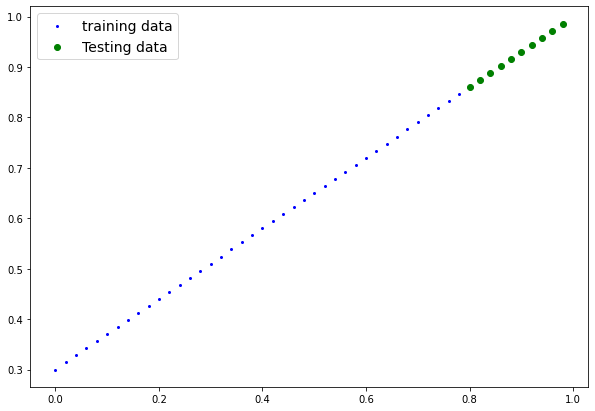

In [7]:
plot_predictions()

## 2. Build model

Our first Pytorch model!

Very interesting... let's do it!

What out model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values.

--> With Gradient descent + Back Propagation.

In [8]:
from torch import nn
# Create linear regresison model class

class LinearRegressionModel(nn.Module): # <- subclass nn.Module
          def __init__(self):
              super().__init__()
              self.weights = nn.Parameter(torch.randn(1,
                                                                                              requires_grad = True,
                                                                                              dtype =  torch.float ))
              self.bias = nn.Parameter(torch.randn(1, 
                                                                                      requires_grad = True,
                                                                                      dtype = torch.float))
              
          # Forward() method to define the computation in the model (ANY SUBCLASS OF NN requires forward)
          def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
              return self.weights * x + self.bias  # regression model.

### Pytorch model building essentials:

* torch.nn  - contains all of the buildings for computational graphs (a NN considered as computational graph).
* torch.nn.Parameter - what parameters should our model learn
* torch.nn.Module - the base Class 
* torch.optim - optimizer
* def forward() - All nn.Module subclasses require you to overwrite what happens 

### Checking the contents of our Pytorch model



In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check out our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.


In [12]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [13]:
# Make predictions with model

with torch.inference_mode():
      y_preds = model_0(X_test)

with torch.no_grad():
      y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [15]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

RuntimeError: ignored

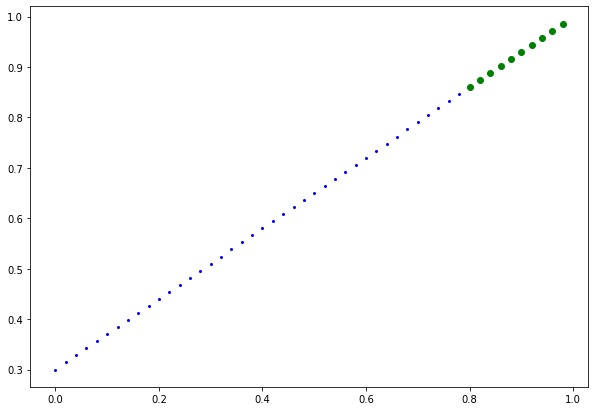

In [16]:
plot_predictions(predictions = y_preds)

## 3. Train model

The whole idea: move from unknown parameters  --> known parameters.

* Loss function ~ Cost function.

* **Lost function:** measures how wrong your model's prediction is to the target.

* **Optimizer:** takes into account the loss and adjust the model's parameters

Specifically we need
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

In [ ]:
model_0.state_dict()

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()


# Setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(),
                                                         lr = 0.001  ) # learning rate

### Building a training loop (and testing) in Pytorch

0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions to make predictions on data- forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad.
4. Loss backward - move backward through the network to calculate the gradients of each of the parameters of our model wrt the loss (**back propagation**)
5. The optimizer step - use opt to adjust and improve model performance.(**gradient descent**).


In [ ]:
model_0.parameters()

In [ ]:
with torch.inference_mode():
  list(model_0.parameters())

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 200

# Track different values
epoch_count = [] 
loss_values = []
test_loss_values = [] 

### Training
# 0. Loop through the data
for epoch in range(epochs): 
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients 

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad() 

  # 4. Perform backpropagation on the loss with respect to the parameters of the model (calculate gradients of each parameter)
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop


  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes - https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=aftDZicoiUGiklEP179x7A
  # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # 1. Do the forward pass 
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happenin'
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())





In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
model_0.state_dict()

In [ ]:
weight, bias

In [ ]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [ ]:
plot_predictions(predictions = y_preds_new)

### Saving a model in Pytorch

There are three main methods you should know:

1. `torch.save()`: allows you save a Pytorch object in Python's pickle format.
2. `torch.load()`: loads a saved Pytorch object.
3. `torch.nn.Module.load_state_dict()`: loads a model's saved state dictionary.

In [ ]:
model_0.state_dict()

In [ ]:
# Saving our Pytorch model:

from pathlib import Path

# 1. Create models directory:
MODEL_PATH  = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True) # Make directory

# 2. Create model save path:
MODEL_NAME = "01_pytorch_workflow_model_0.pth" # common model extension in Python
MODEL_SAVE_PATH  =  MODEL_PATH / MODEL_NAME

# 3. Save the model for State dict:
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj = model_0.state_dict(),
                      f = MODEL_SAVE_PATH)

In [ ]:
!ls -l models

### Load a Pytorch model:

Since we save the model's ``state_dict()`, we'll create a new instance of our model class.

In [ ]:
model_0.state_dict()

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

In [ ]:
loaded_model_0.state_dict()

In [ ]:
# Make some predictions with our loaded model:

loaded_model_0.eval()

with torch.inference_mode():
      loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

In [17]:
y_preds == loaded_model_preds

NameError: ignored

## Putting things together

In [1]:
# Import Pytorch

import torch 
from torch import nn
import matplotlib.pyplot as plt

# Check Pytorch version
torch.__version__

'1.12.1+cu113'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [2]:
# setup device agnostic code

device = 'cuda' if torch.cuda.is_available else 'cpu'
print(f"Using device {device}")

Using device cuda


### 6.1 Data:

In [3]:
# Create some data:

weight = 0.7
bias  = 0.3

# Create range values
start = 0 
end =   1
step  = 0.02

# Create X and Y
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
# Split data:
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

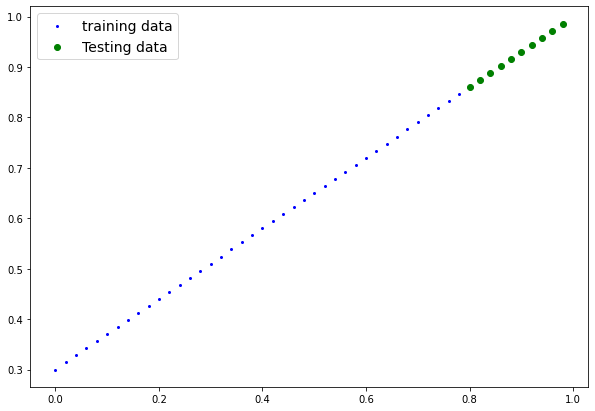

In [7]:
# PLot data

plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a Pytorch linear model

In [8]:
# Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features = 1, 
                                                          out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict() 

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [11]:
# Check the model current device:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [12]:
# Set the model to use the target device:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training:

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop


In [14]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                                                        lr = 0.001)


In [16]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

X_train = X_train.to(device)
y_train  = y_train.to(device)
X_test  = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss =  loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimzer step
  optimizer.step()

  # Testing:
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)
    # print out what's happening

    if epoch%10 ==0:
        print(f"Epoch: {epoch}    |           Loss:   {loss}            |     Test loss  :     {test_loss}")

Epoch: 0    |           Loss:   0.5551779866218567            |     Test loss  :     0.5861001014709473
Epoch: 10    |           Loss:   0.5436570644378662            |     Test loss  :     0.5726293921470642
Epoch: 20    |           Loss:   0.5321362614631653            |     Test loss  :     0.5591585040092468
Epoch: 30    |           Loss:   0.5206153988838196            |     Test loss  :     0.5456876754760742
Epoch: 40    |           Loss:   0.5090945363044739            |     Test loss  :     0.5322169661521912
Epoch: 50    |           Loss:   0.49757376313209534            |     Test loss  :     0.5187460780143738
Epoch: 60    |           Loss:   0.48605284094810486            |     Test loss  :     0.5052752494812012
Epoch: 70    |           Loss:   0.47453203797340393            |     Test loss  :     0.49180442094802856
Epoch: 80    |           Loss:   0.4630111753940582            |     Test loss  :     0.4783336818218231
Epoch: 90    |           Loss:   0.4514903724193573 

In [17]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6865]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.6300], device='cuda:0'))])

In [18]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions:


In [19]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[1.1792],
        [1.1930],
        [1.2067],
        [1.2204],
        [1.2342],
        [1.2479],
        [1.2616],
        [1.2754],
        [1.2891],
        [1.3028]], device='cuda:0')

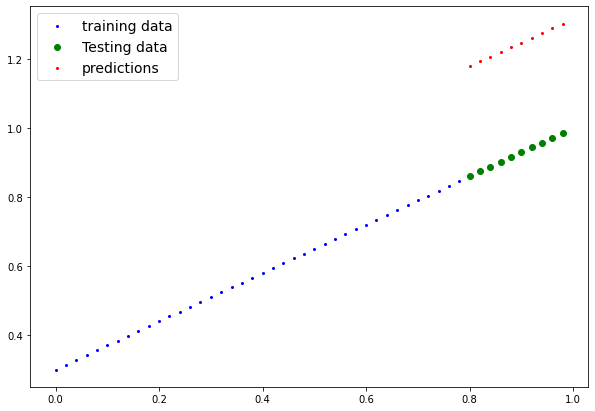

In [20]:
plot_predictions(predictions = y_preds.cpu())

### 6.5 Saving and loading model

In [23]:
from pathlib import Path

# 1. Create model directory:
MODEL_PATH  = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/ MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),
                      f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [24]:
# Load a trained Pytorch model:

# Create a new instance of linear regression model V2:
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [25]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [26]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6865]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.6300], device='cuda:0'))])

In [28]:
# Evaluate loaded model
loaded_model_1.eval()

with torch.inference_mode():
        loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')